In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('dataset.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [75]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

### Renaming Target class and removing ID col

In [76]:
df.rename(columns = {'Reached.on.Time_Y.N' : 'Reached'}, inplace = True)
df = df.drop('ID', axis = 1)

In [77]:
for column in df.columns:
    print('='*20)
    print(column, " : ")
    print(df[column].unique())

Warehouse_block  : 
['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment  : 
['Flight' 'Ship' 'Road']
Customer_care_calls  : 
[4 2 3 5 6 7]
Customer_rating  : 
[2 5 3 1 4]
Cost_of_the_Product  : 
[177 216 183 176 184 162 250 233 150 164 189 232 198 275 152 227 143 239
 145 161 156 211 251 225 172 234 266 257 223 149 137 181 215 269 139 174
 151 210 169 160 190 141 165 170 203 246 238 193 221 179 105 261 202 109
 158 231 206 187 230 113 180 132 217 197 185 278 229 186 286 175 219 213
 235 271 144 218 263 168 265 205 252 222 220 147 200 224 247 280 157 207
 237 264 248 191 146 135  98  97 114 112 274 166 148 270 242 192 116 255
 209 134 130 133 140 136 142 154 155 127 129 159 294 226 258 241 208 182
 115 212 171 249 243 163 272 138 273 279 173 194 262 201 260 188 267 131
 122 103 199 236 167 259 178 123 124  96 244 254 128 204 245 228 268 108
 276 214 281 253 104 240 121 153 111 117 195 110 119 196 291 118 283 100
 256 285 284 101 296 277 106 282 126 102 120  99 125 107 301 290 310 308
 300 303 306 29

In [78]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [79]:
df.groupby('Warehouse_block')['Reached'].value_counts().reset_index()

,Warehouse_block,Reached,count
0,A,1,1075
1,A,0,758
2,B,1,1104
3,B,0,729
4,C,1,1094
5,C,0,739
6,D,1,1096
7,D,0,738
8,F,1,2194
9,F,0,1472


In [80]:
df['Reached'].value_counts()

Reached
1    6563
0    4436
Name: count, dtype: int64

range(0, 5)


<Figure size 1200x400 with 0 Axes>

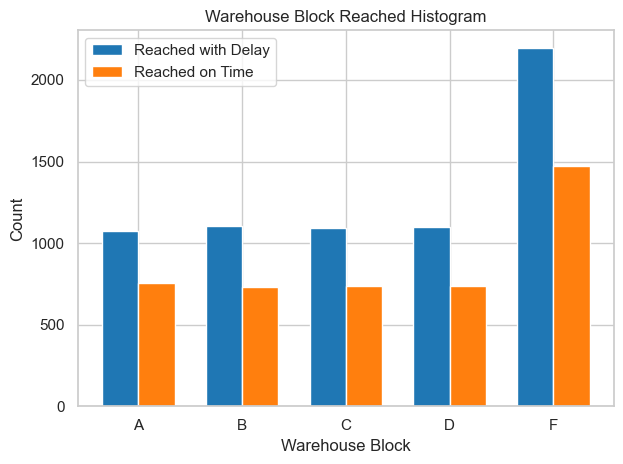

In [81]:
plt.figure(figsize = (12, 4))
temp = df.groupby('Warehouse_block')['Reached'].value_counts().reset_index()
reach_1 = temp[temp['Reached'] == 1]['count'].tolist()
reach_2 = temp[temp['Reached'] == 0]['count'].tolist()

bar_width = 0.35
x = range(len(reach_1))
fig, ax = plt.subplots()
print(x)
# Create bars for "Reached 1"
bar1 = ax.bar(x, reach_1, width=bar_width, label='Reached with Delay')
bar2 = ax.bar([i + bar_width for i in x], reach_2, width=bar_width, label='Reached on Time')

# Set labels, title, and x-axis ticks
ax.set_xlabel('Warehouse Block')
ax.set_ylabel('Count')
ax.set_title('Warehouse Block Reached Histogram')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(temp['Warehouse_block'].unique())

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
